In [2]:
import torch
import numpy as np
from torch import nn
import random
import math
import matplotlib.pyplot as plt

from model import BG

In [4]:
import json
data = json.loads(open("datasets/dataset4.json").read())
X_train = np.array(data["X"]).astype(np.double)
Y_train = np.array(data["Y"]).astype(np.double)
len(data["X"])

283

In [5]:

model = BG()

guess: tensor([0.5240, 0.1219], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.6555, 0.0957], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.0288, 0.2039], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.2971, 0.1603], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.9352, 0.0403], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.0277, 0.2034], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.5473, 0.1127], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([-0.0169,  0.1886], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.5189, 0.1223], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.9783, 0.0169], grad_fn=<AddBackward0>), target: tensor([1, 0])
guess: tensor([0.0265, 0.2016], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.4093, 0.1410], grad_fn=<AddBackward0>), target: tensor([0, 1])
guess: tensor([0.3216, 0.1565], grad_f

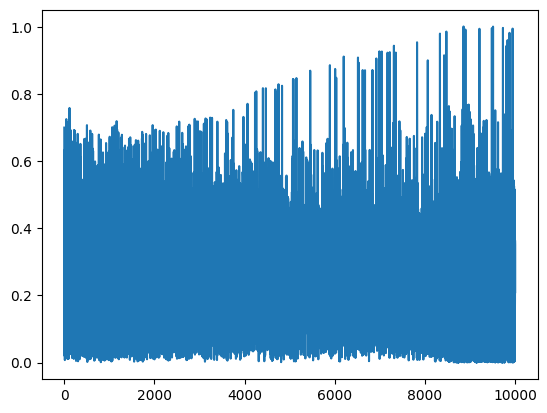

In [12]:
loss_function = nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
loses = []
for i in range(10000):
    samp = math.floor(random.random()*len(X_train))
    input = torch.tensor(X_train[samp]).float()
    target = torch.tensor(Y_train[samp]).long()
    optim.zero_grad()
    guess = model(input)
    print(f"guess: {guess}, target: {target}")
    loss = loss_function(guess, target)
    loss.backward()
    optim.step()
    loses.append(loss.item())
plt.plot(loses)

In [5]:
# load model
model = BG()
model.load_state_dict("models/color_1.pt")
model.eval()

TypeError: Expected state_dict to be dict-like, got <class 'str'>.

In [13]:
# test
color = torch.tensor(np.array([27/255, 242/255, 84/255])).float()
model(color)


tensor([0.2137, 0.8300], grad_fn=<AddBackward0>)

In [ ]:
torch.save(model.state_dict(), "models/color_2.pt")